In [1]:
import numpy as np
import pandas as pd
import scanpy as sc
import anndata as ad
import pathlib
import glob
import os 
import seaborn as sns
import scipy
import rpy2
from matplotlib import pyplot as plt
from scipy.sparse import csr_matrix

In [4]:
# Load labelled atlas
final = sc.read_h5ad('/project/data/gew123/Cell_Annotation/Annotated_Objects/labelled_atlas_FINAL.h5ad')

In [2]:
# Take 2 with new labels - pre immune subset clustering, but refined sympatho adrenal labels
final = sc.read_h5ad('/project/data/gew123/Cell_Annotation/Annotated_Objects/labelled_atlas_FINAL_UPDATED.h5ad')

In [4]:
# Load integrated, unlabelled object
original = sc.read_h5ad('/project/data/gew123/Integration/Merged_Processed_NB.h5ad')

In [9]:
# Extract cell barcodes (or indices) from the smaller AnnData object
final_cells = final.obs.index

# Filter the larger AnnData object to keep only the cells present in the smaller AnnData object
adata = original[final_cells].copy()

In [10]:
adata

AnnData object with n_obs × n_vars = 180681 × 64612
    obs: 'Source', 'n_genes_by_counts', 'log1p_n_genes_by_counts', 'total_counts', 'log1p_total_counts', 'pct_counts_in_top_20_genes', 'total_counts_mt', 'log1p_total_counts_mt', 'pct_counts_mt', 'total_counts_ribo', 'log1p_total_counts_ribo', 'pct_counts_ribo', 'total_counts_hb', 'log1p_total_counts_hb', 'pct_counts_hb', 'outlier'
    var: 'mt', 'ribo', 'hb', 'n_cells_by_counts', 'mean_counts', 'log1p_mean_counts', 'pct_dropout_by_counts', 'total_counts', 'log1p_total_counts', 'highly_variable', 'means', 'dispersions', 'dispersions_norm', 'highly_variable_nbatches', 'highly_variable_intersection'
    uns: 'Source_colors', 'hvg', 'neighbors', 'pca', 'umap'
    obsm: 'X_pca', 'X_umap'
    varm: 'PCs'
    layers: 'log1p', 'log_counts', 'norm_counts', 'raw_counts'
    obsp: 'connectivities', 'distances'

In [15]:
# Transfer UMAP profile, Scvi embeddings and the adata.obs from integrated to original (keeping 64k genes)
adata.obsm['X_pca'] = final.obsm['X_pca']
adata.obsm['X_umap'] = final.obsm['X_umap']
adata.obsm['X_scVI'] = final.obsm['X_scVI']

# Transfer color maps
adata.uns = final.uns

del adata.varm['PCs']
del adata.obsp['connectivities']
del adata.obsp['distances']

# Deleted also color maps

In [17]:
final.obs

,Source,n_genes_by_counts,log1p_n_genes_by_counts,total_counts,log1p_total_counts,pct_counts_in_top_20_genes,total_counts_mt,log1p_total_counts_mt,pct_counts_mt,total_counts_ribo,...,pct_counts_ribo,total_counts_hb,log1p_total_counts_hb,pct_counts_hb,outlier,_scvi_batch,_scvi_labels,leiden_res0.7,leiden_res0.9,manual_labels
AAACCTGAGCAATATG_1,Jansky,1165,7.061334,1706.0,7.442493,19.460727,0.0,0.000000,0.000000,39.0,...,2.286049,0.0,0.000000,0.000000,False,0,0,16,15,Neuroblasts
AAACCTGAGCGCTTAT_1,Jansky,901,6.804615,1225.0,7.111512,17.142857,2.0,1.098612,0.163265,53.0,...,4.326531,0.0,0.000000,0.000000,False,0,0,16,15,Neuroblasts
AAACCTGAGGCACATG_1,Jansky,1414,7.254885,2027.0,7.614805,13.616182,2.0,1.098612,0.098668,52.0,...,2.565368,0.0,0.000000,0.000000,False,0,0,16,15,Neuroblasts
AAACCTGAGTGGCACA_1,Jansky,1051,6.958448,1392.0,7.239215,14.224138,2.0,1.098612,0.143678,50.0,...,3.591954,0.0,0.000000,0.000000,False,0,0,16,15,Neuroblasts
AAACCTGAGTTCGCAT_1,Jansky,958,6.865891,1364.0,7.218910,18.035191,5.0,1.791759,0.366569,46.0,...,3.372434,1.0,0.693147,0.073314,False,0,0,16,15,Neuroblasts
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
J15-39,Wienke,2091,7.645876,5550.4,8.621805,15.840300,357.0,5.880533,6.431969,591.3,...,10.653286,0.0,0.000000,0.000000,False,4,0,11,2,Active T cells
N4-39,Wienke,1602,7.379632,3382.8,8.126755,14.213078,216.9,5.384036,6.411848,382.1,...,11.295377,0.0,0.000000,0.000000,False,4,0,9,8,Active T cells
N18-39,Wienke,2194,7.693937,4917.2,8.500698,11.392662,178.3,5.189060,3.626047,417.0,...,8.480436,1.0,0.693147,0.020337,False,4,0,11,11,Helper T cells
O14-39,Wienke,2260,7.723562,5545.8,8.620976,14.544340,333.3,5.812039,6.009953,474.2,...,8.550615,0.0,0.000000,0.000000,False,4,0,11,11,Helper T cells


In [26]:
# Transfer .obs columns
adata.obs = adata.obs.join(final.obs[['leiden_res0.7', 'leiden_res0.9', 'manual_labels']])

In [28]:
# Check .X
print(adata.X[1:10,1:10]) # looks like it's already log transformed - get raw counts again

  (3, 6)	0.8521040549904921


In [35]:
adata

AnnData object with n_obs × n_vars = 180681 × 64612
    obs: 'Source', 'n_genes_by_counts', 'log1p_n_genes_by_counts', 'total_counts', 'log1p_total_counts', 'pct_counts_in_top_20_genes', 'total_counts_mt', 'log1p_total_counts_mt', 'pct_counts_mt', 'total_counts_ribo', 'log1p_total_counts_ribo', 'pct_counts_ribo', 'total_counts_hb', 'log1p_total_counts_hb', 'pct_counts_hb', 'outlier', 'leiden_res0.7', 'leiden_res0.9', 'manual_labels'
    var: 'mt', 'ribo', 'hb', 'n_cells_by_counts', 'mean_counts', 'log1p_mean_counts', 'pct_dropout_by_counts', 'total_counts', 'log1p_total_counts', 'highly_variable', 'means', 'dispersions', 'dispersions_norm', 'highly_variable_nbatches', 'highly_variable_intersection'
    uns: 'Source_colors', '_scvi_manager_uuid', '_scvi_uuid', 'dea_leiden_0.9', 'dendrogram_leiden_res0.9', 'hvg', 'leiden', 'leiden_res0.7_colors', 'leiden_res0.9_colors', 'manual_labels_colors', 'neighbors', 'pca', 'umap'
    obsm: 'X_pca', 'X_umap', 'X_scVI'
    layers: 'log1p', 'log_coun

In [37]:
# Set raw counts to top
adata.X = adata.layers['raw_counts'].copy()

# Delete outdated layers
del adata.layers['log1p']
del adata.layers['norm_counts']
del adata.layers['log_counts']

In [39]:
# Save reference
adata.write('/project/data/gew123/Spatial/Objects/Reference_atlas_annotated_ALLGENES_UPDATED.h5ad')

## Integrating new immune labels in:

In [167]:
# Read in final atlas
adata = sc.read_h5ad('/project/data/gew123/Spatial/Objects/Reference_atlas_annotated_ALLGENES_UPDATED.h5ad')

In [168]:
# Read in labelled immune subset
immune = sc.read_h5ad('/project/data/gew123/Cell_Annotation/immune_cell_subset_annotated_ALLGENES_FINAL.h5ad')

/project/soft/linux64/anaconda/Anaconda3-2023.09-0-Linux-x86_64/lib/python3.11/site-packages/scanpy/plotting/_tools/scatterplots.py:394: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(


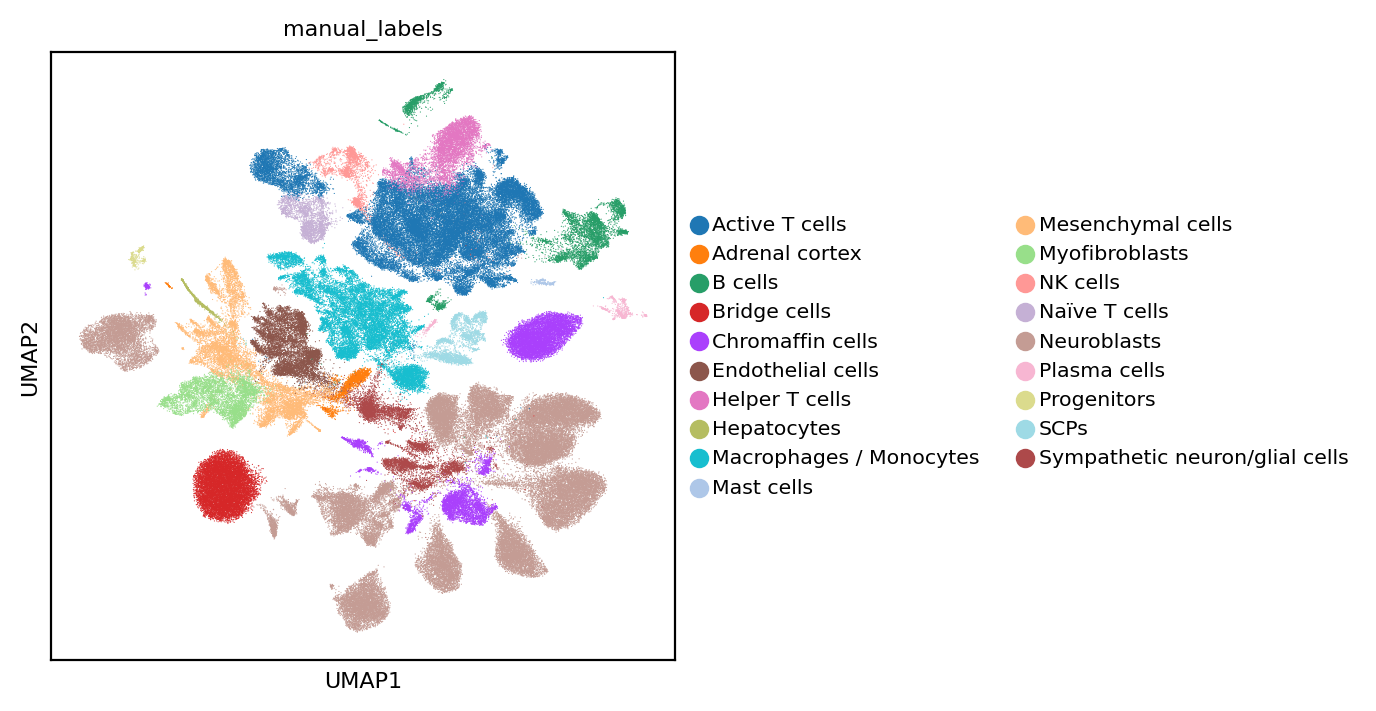

In [10]:
# Plot of original labels
sc.set_figure_params(scanpy=True, dpi=100, dpi_save=400, fontsize=8)

sc.pl.umap(adata, color=['manual_labels'], palette=plt.rcParams['axes.prop_cycle'])

In [169]:
# Get index of overlapping cells
overlap_cells = adata.obs_names.intersection(immune.obs_names)

In [170]:
# Generate new column of final annotations, update with new immune labels
adata.obs.loc[overlap_cells, 'manual_labels_final'] = immune.obs.loc[overlap_cells, 'manual_labels_new']

In [171]:
# Add in sympathoadrenal labels

# Get index of NaN cells
nan_cells = adata.obs[pd.isna(adata.obs['manual_labels_final'])].index

In [172]:
new_labels = adata.obs['manual_labels'][nan_cells].unique().tolist()

In [43]:
new_labels

['Neuroblasts',
 'Mesenchymal cells',
 'Chromaffin cells',
 'Endothelial cells',
 'Sympathetic neuron/glial cells',
 'Bridge cells',
 'Myofibroblasts',
 'SCPs',
 'Hepatocytes',
 'Adrenal cortex',
 'Progenitors']

In [74]:
final_categories = adata.obs['manual_labels_final'].cat.categories
final_categories

Index(['B cells', 'Cytotoxic (CD8+) T cells', 'Cytotoxic (CD8+/IGKC+) T cells',
       'Helper (CD4+) T cells', 'Macrophages/monocytes', 'Mast cells',
       'NK cells', 'Naïve T cells', 'Plasma cells', 'Proliferating T cells',
       'Sympathetic neuronal/glial cells', 'Sympathetic neurons'],
      dtype='object')

In [77]:
original_categories = adata.obs['manual_labels'].cat.categories
original_categories

Index(['Active T cells', 'Adrenal cortex', 'B cells', 'Bridge cells',
       'Chromaffin cells', 'Endothelial cells', 'Helper T cells',
       'Hepatocytes', 'Macrophages/monocytes', 'Mast cells',
       'Mesenchymal cells', 'Myofibroblasts', 'NK cells', 'Naïve T cells',
       'Neuroblasts', 'Plasma cells', 'Progenitors', 'SCPs',
       'Sympathetic neuronal/glial cells'],
      dtype='object')

In [173]:
# Fix a few labels for formatting
immune.obs['manual_labels_new'] = immune.obs['manual_labels_new'].replace('Sympathetic neuron/glial cells', 'Sympathetic neuronal/glial cells')
adata.obs['manual_labels_final'] = adata.obs['manual_labels_final'].replace('Sympathetic neuron/glial cells', 'Sympathetic neuronal/glial cells')
adata.obs['manual_labels'] = adata.obs['manual_labels'].replace('Macrophages / Monocytes', 'Macrophages/monocytes')

In [174]:
# Now we want to transfer labels for these cells
# But first need to set categories
current_categories = adata.obs['manual_labels_final'].cat.categories

# First add any new labels to categories
new_labels = adata.obs['manual_labels'][nan_cells].unique().tolist() # Getting new labels

# Combine current and new categories
#updated_categories = list(current_categories) + new_labels
#updated_categories.remove('Progenitors')

In [175]:
# Transfer new categories
adata.obs['manual_labels_final'] = adata.obs['manual_labels_final'].cat.add_categories(new_labels)

In [176]:
# Verify category additions
adata.obs['manual_labels_final'].cat.categories

Index(['B cells', 'Cytotoxic (CD8+) T cells', 'Cytotoxic (CD8+/IGKC+) T cells',
       'Helper (CD4+) T cells', 'Macrophages/monocytes', 'Mast cells',
       'NK cells', 'Naïve T cells', 'Plasma cells', 'Proliferating T cells',
       'Sympathetic neuronal/glial cells', 'Sympathetic neurons',
       'Neuroblasts', 'Mesenchymal cells', 'Chromaffin cells',
       'Endothelial cells', 'Sympathetic neuron/glial cells', 'Bridge cells',
       'Myofibroblasts', 'SCPs', 'Hepatocytes', 'Adrenal cortex',
       'Progenitors'],
      dtype='object')

In [177]:
# Now transfer labels
new_labels_list = adata.obs['manual_labels'][nan_cells].tolist()

for cell_id, cell_label in zip(nan_cells, new_labels_list):
    adata.obs.at[cell_id, 'manual_labels_final'] = cell_label

In [178]:
# Check categories
adata.obs['manual_labels_final'].cat.categories

Index(['B cells', 'Cytotoxic (CD8+) T cells', 'Cytotoxic (CD8+/IGKC+) T cells',
       'Helper (CD4+) T cells', 'Macrophages/monocytes', 'Mast cells',
       'NK cells', 'Naïve T cells', 'Plasma cells', 'Proliferating T cells',
       'Sympathetic neuronal/glial cells', 'Sympathetic neurons',
       'Neuroblasts', 'Mesenchymal cells', 'Chromaffin cells',
       'Endothelial cells', 'Sympathetic neuron/glial cells', 'Bridge cells',
       'Myofibroblasts', 'SCPs', 'Hepatocytes', 'Adrenal cortex',
       'Progenitors'],
      dtype='object')

In [179]:
# Save progress
adata.write('/project/data/gew123/Spatial/Objects/Reference_atlas_annotated_ALLGENES_FINAL.h5ad')

Plot to check

/project/soft/linux64/anaconda/Anaconda3-2023.09-0-Linux-x86_64/lib/python3.11/site-packages/scanpy/plotting/_tools/scatterplots.py:394: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(


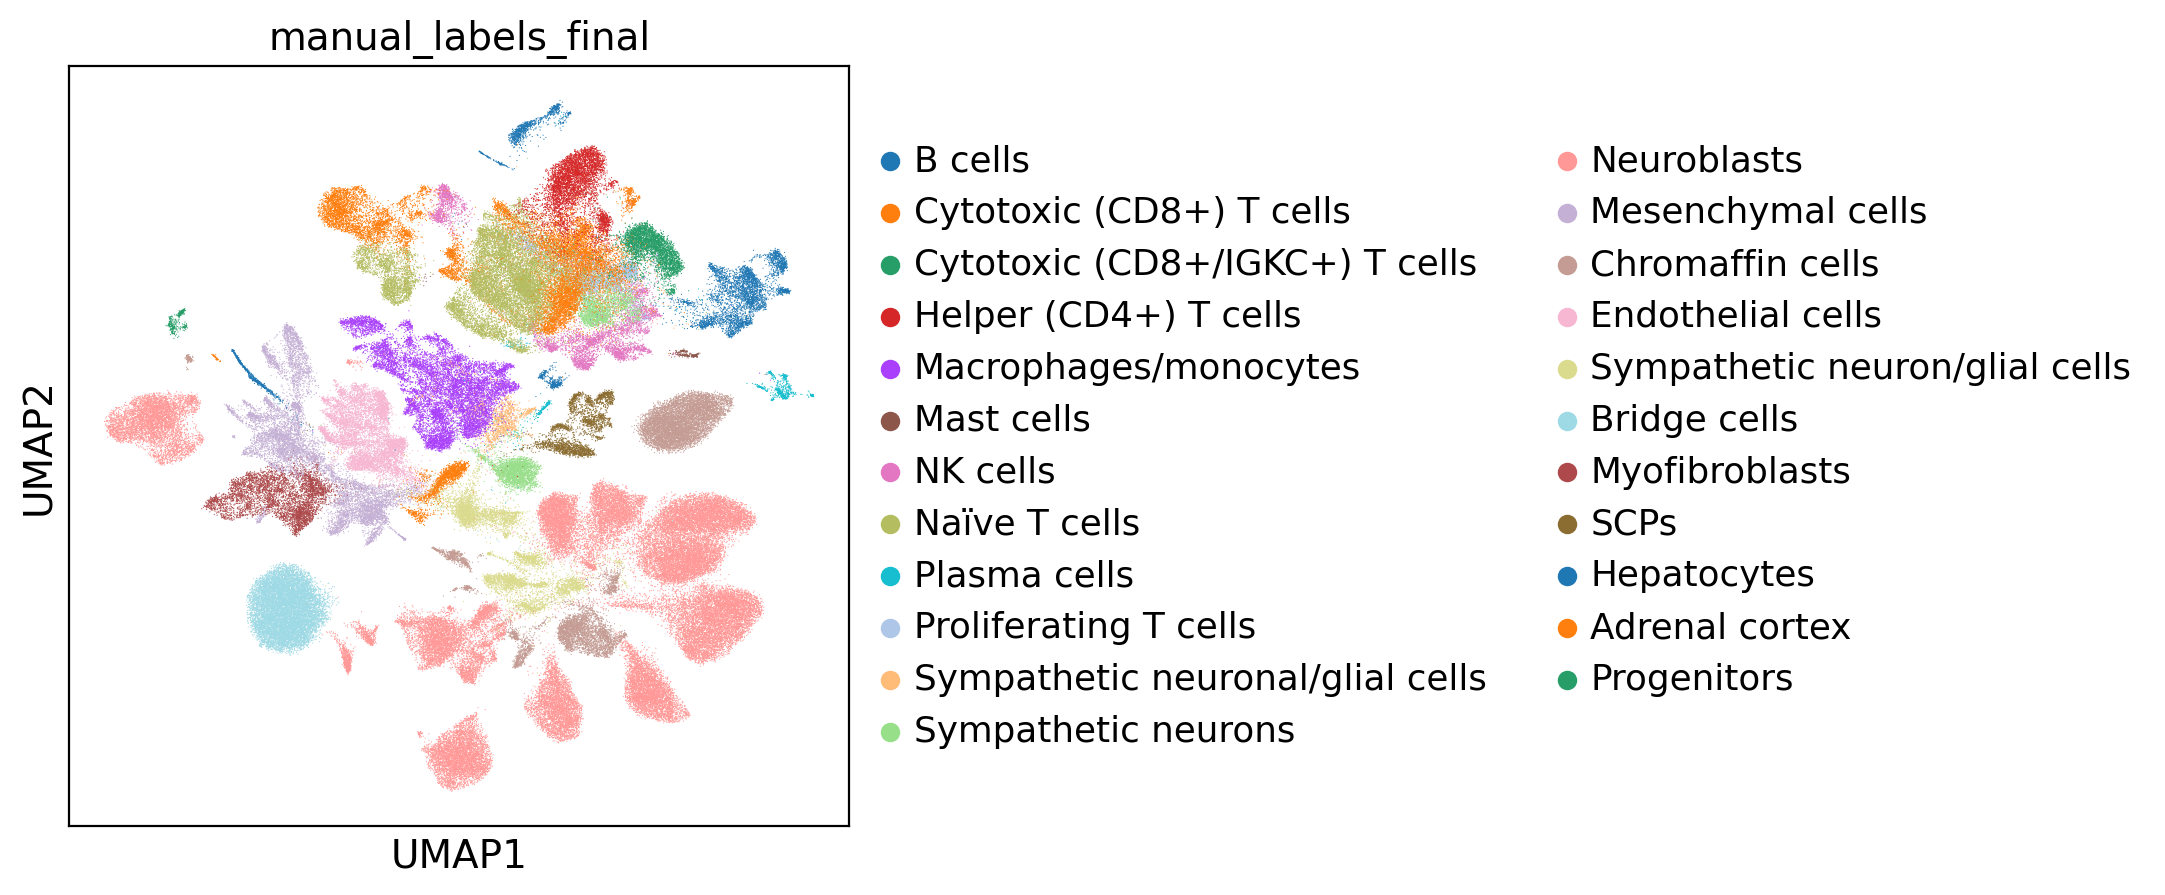

In [181]:
# Plot
sc.set_figure_params(scanpy=True, dpi=100, dpi_save=400, figsize=(5,5))

sns_colors = sns.color_palette("husl", 23)
mpl_colors = plt.rcParams['axes.prop_cycle']

sc.pl.umap(adata, color=['manual_labels_final'], palette=mpl_colors)

In [182]:
# Final update - merge symathetic neuronal/glial & sympathetic neuron/glial to single category
adata.obs['manual_labels_final'] = adata.obs['manual_labels_final'].replace('Sympathetic neuron/glial cells', 'Sympathetic neuronal/glial cells')

/project/soft/linux64/anaconda/Anaconda3-2023.09-0-Linux-x86_64/lib/python3.11/site-packages/scanpy/plotting/_tools/scatterplots.py:394: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(


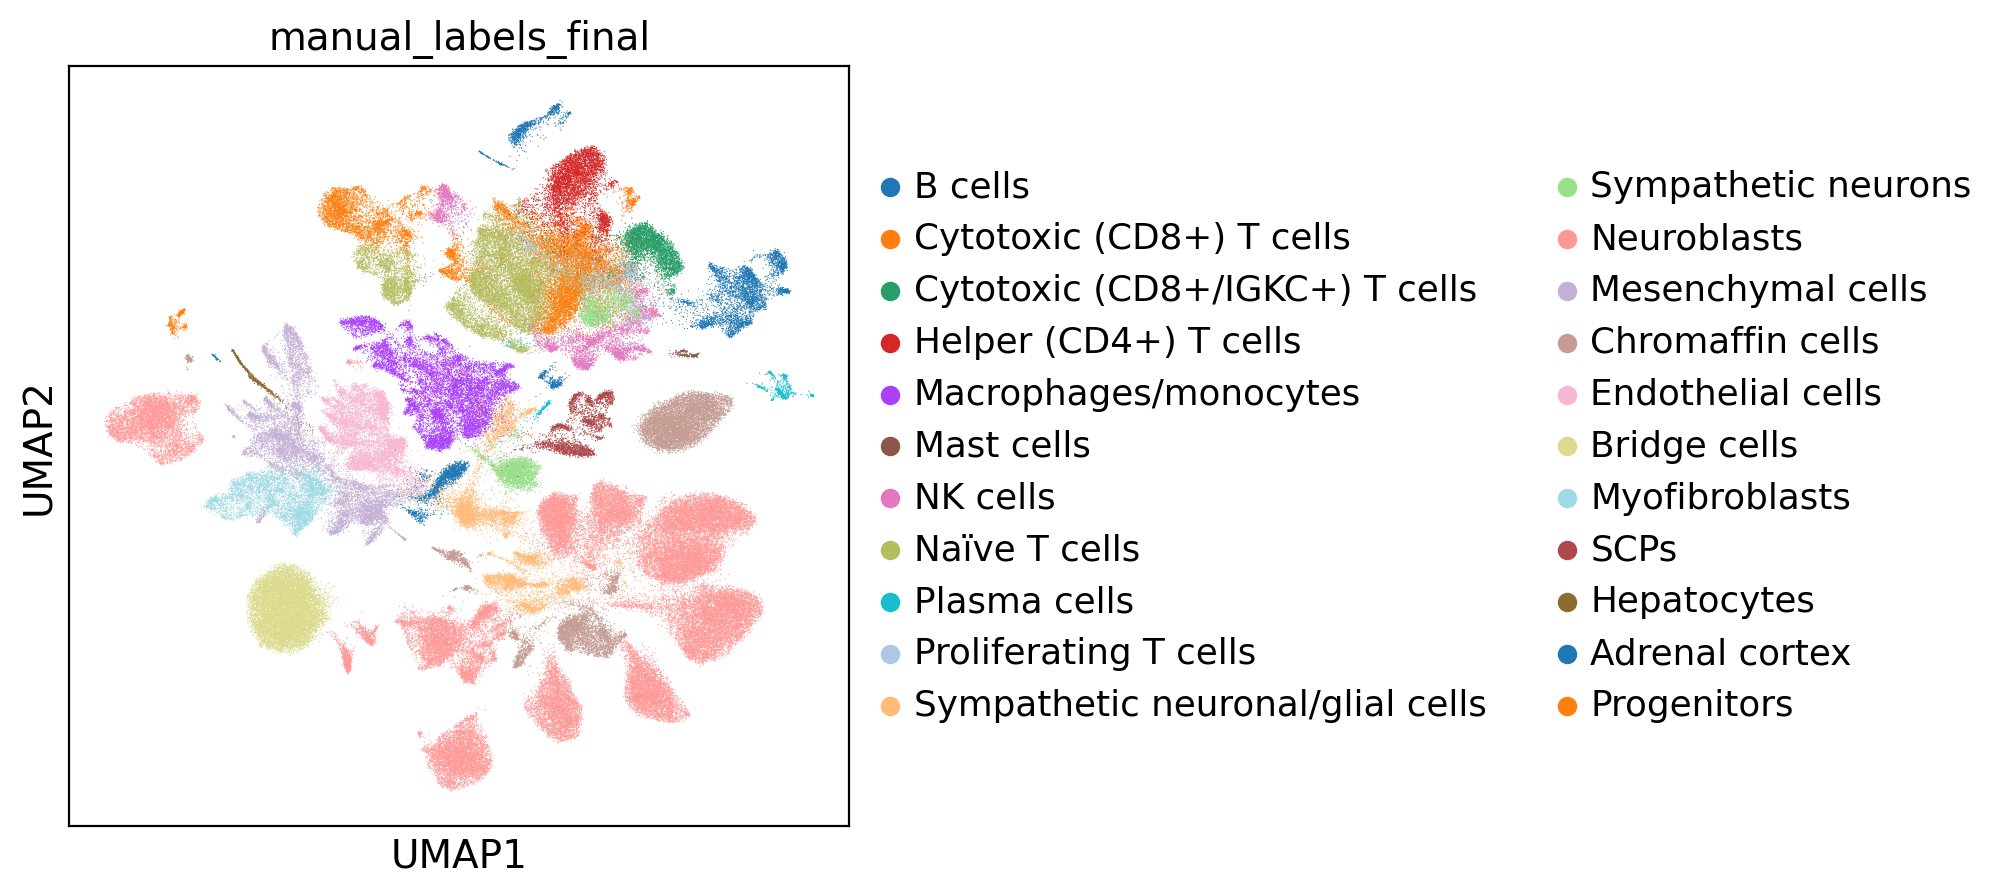

In [183]:
# Replot
sc.pl.umap(adata, color=['manual_labels_final'], palette=mpl_colors)

/project/soft/linux64/anaconda/Anaconda3-2023.09-0-Linux-x86_64/lib/python3.11/site-packages/scanpy/plotting/_tools/scatterplots.py:394: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(


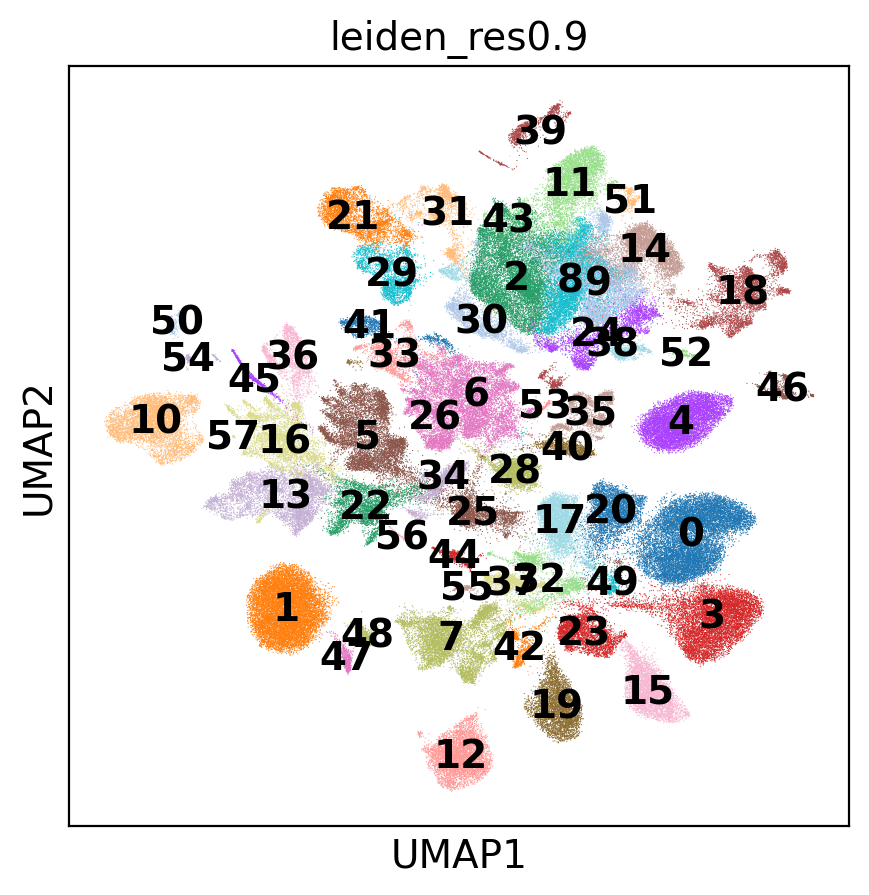

In [209]:
sc.pl.umap(adata, color=['leiden_res0.9'], palette=mpl_colors, legend_loc='on data')

In [161]:
# Check progenitor population - cluster 45
clusters = list(adata.obs['leiden_res0.9'].unique())
for index, i in enumerate(clusters):
    clusters[index] = int(i)
clusters.sort()

degs_results = adata.uns['dea_leiden_0.9']
for i in clusters:
    # Get the names of the top 5 genes for the specified cluster
    print(f'Cluster {i}:', list(degs_results['names'][f'{i}'][:5]))

Cluster 0: ['DGKB', 'NXPH1', 'CNTNAP2', 'MEG3', 'ALCAM']
Cluster 1: ['RASGEF1B', 'FGF14', 'SLC26A3', 'CREB5', 'MEIS2']
Cluster 2: ['ZFP36L2', 'BTG1', 'CXCR4', 'IL7R', 'CD52']
Cluster 3: ['LRRTM4', 'NXPH1', 'SORBS2', 'ZNF804A', 'MAPT']
Cluster 4: ['ERBB4', 'CHGA', 'ANKRD30A', 'FGF14', 'MEG3']
Cluster 5: ['LDB2', 'HSPG2', 'NEAT1', 'PECAM1', 'CALCRL']
Cluster 6: ['SAT1', 'CD74', 'HLA-DRA', 'TYROBP', 'HLA-DRB1']
Cluster 7: ['MLLT11', 'MARCKSL1', 'TUBA1A', 'CCND1', 'SCG2']
Cluster 8: ['CCL5', 'PTPRC', 'CXCR4', 'HLA-A', 'ZFP36L2']
Cluster 9: ['CD52', 'HLA-A', 'CXCR4', 'LTB', 'S100A4']
Cluster 10: ['H2AFZ', 'STMN1', 'MYCN', 'SLC25A4', 'PPP1R14B']
Cluster 11: ['CD52', 'IGKC', 'S100A4', 'LTB', 'CREM']
Cluster 12: ['DDX1', 'NBAS', 'NPY', 'HDAC9', 'ST6GALNAC3']
Cluster 13: ['CALD1', 'LGALS1', 'MYL9', 'VIM', 'TPM2']
Cluster 14: ['CCL5', 'NKG7', 'HLA-A', 'IGKC', 'CST7']
Cluster 15: ['NPY', 'CNTNAP2', 'PHACTR1', 'ZNF804A', 'CCND1']
Cluster 16: ['MGP', 'COL1A2', 'COL1A1', 'COL3A1', 'TIMP1']
Cluster 1

In [222]:
# Get top 10 DEGs
i = 9
print(f'Cluster {i}:', list(degs_results['names'][f'{i}'][:10]))

Cluster 9: ['CD52', 'HLA-A', 'CXCR4', 'LTB', 'S100A4', 'HLA-B', 'CD3D', 'ARHGDIB', 'CREM', 'S100A6']


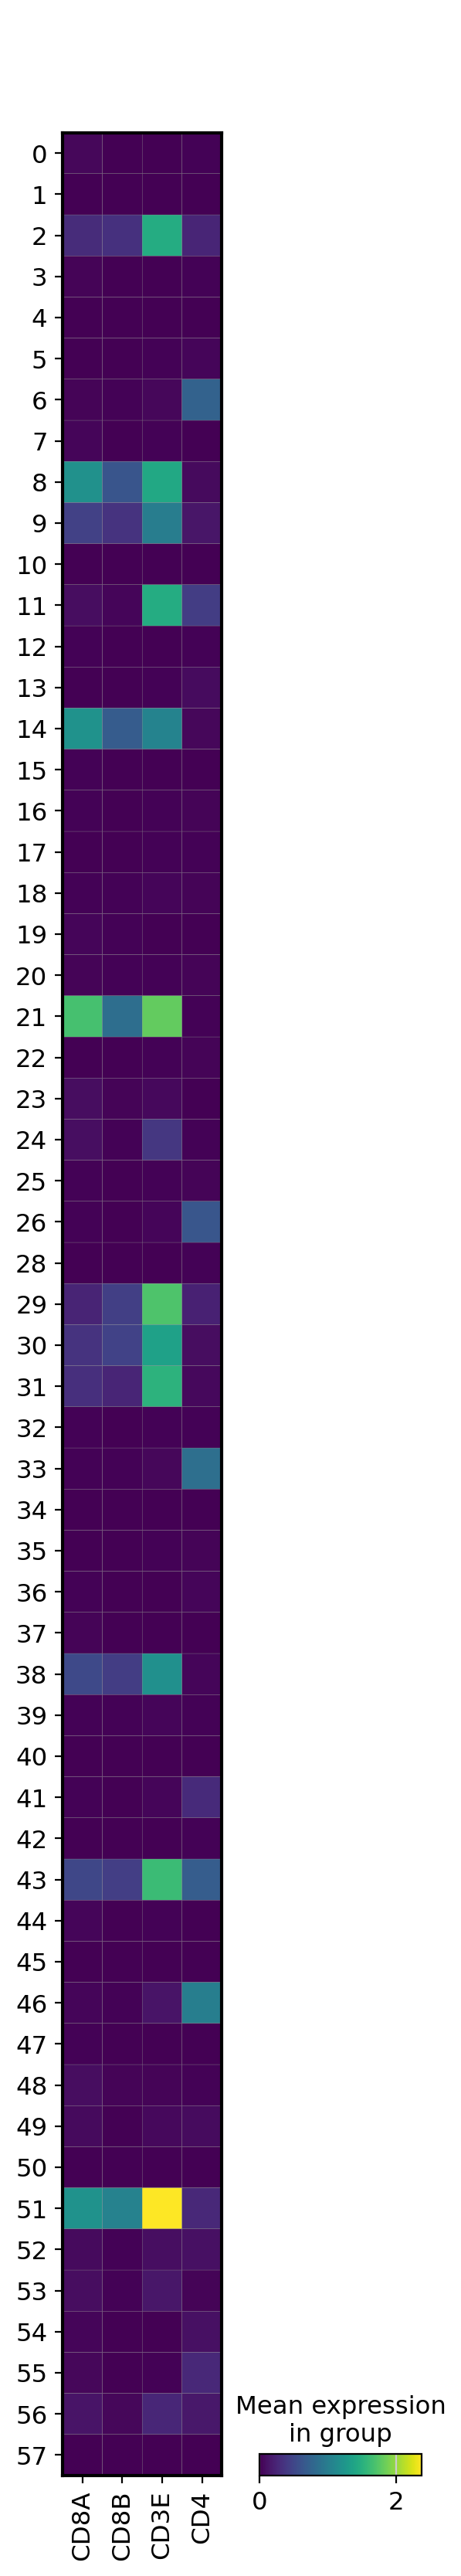

In [229]:
sc.pl.matrixplot(adata, ['CD8A', 'CD8B', 'CD3E', 'CD4'], groupby='leiden_res0.9', cmap='viridis')

In [221]:
# Confirm progenitor labels
cluster50 = adata[adata.obs['leiden_res0.9'] == '50']

progenitor_count = 0
other_cell_type = 0
for cell_type in cluster50.obs['manual_labels_final']:
    if cell_type == 'Progenitors':
        progenitor_count += 1
    else:
        other_cell_type += 1
# Print results
print('Progenitors:', progenitor_count)
print('Other cell type:', other_cell_type)
print('Total # Cells:', len(cluster50))

Progenitors: 328
Other cell type: 0
Total # Cells: 328


Reassigning/finalizing some labels

In [256]:
# Check if any progenitor labels exist outside of cluster 50
adata.obs['leiden_res0.9'][adata.obs['manual_labels_final'] == 'Progenitors'].unique()

['50']
Categories (57, object): ['0', '1', '2', '3', ..., '54', '55', '56', '57']

In [257]:
# 1) No, so reassign progenitors (cluster 50) as sympathetic neuronal/glial cells
adata.obs['manual_labels_final'] = adata.obs['manual_labels_final'].replace('Progenitors', 'Sympathetic neuronal/glial cells')

In [255]:
# 2) Reassign cluster 9 as proliferating t cells
cluster9 = adata.obs_names[adata.obs['leiden_res0.9'] == '9']
for cell_id in cluster9:
    adata.obs.at[cell_id, 'manual_labels_final'] = 'Proliferating T cells'

/project/soft/linux64/anaconda/Anaconda3-2023.09-0-Linux-x86_64/lib/python3.11/site-packages/scanpy/plotting/_tools/scatterplots.py:394: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(


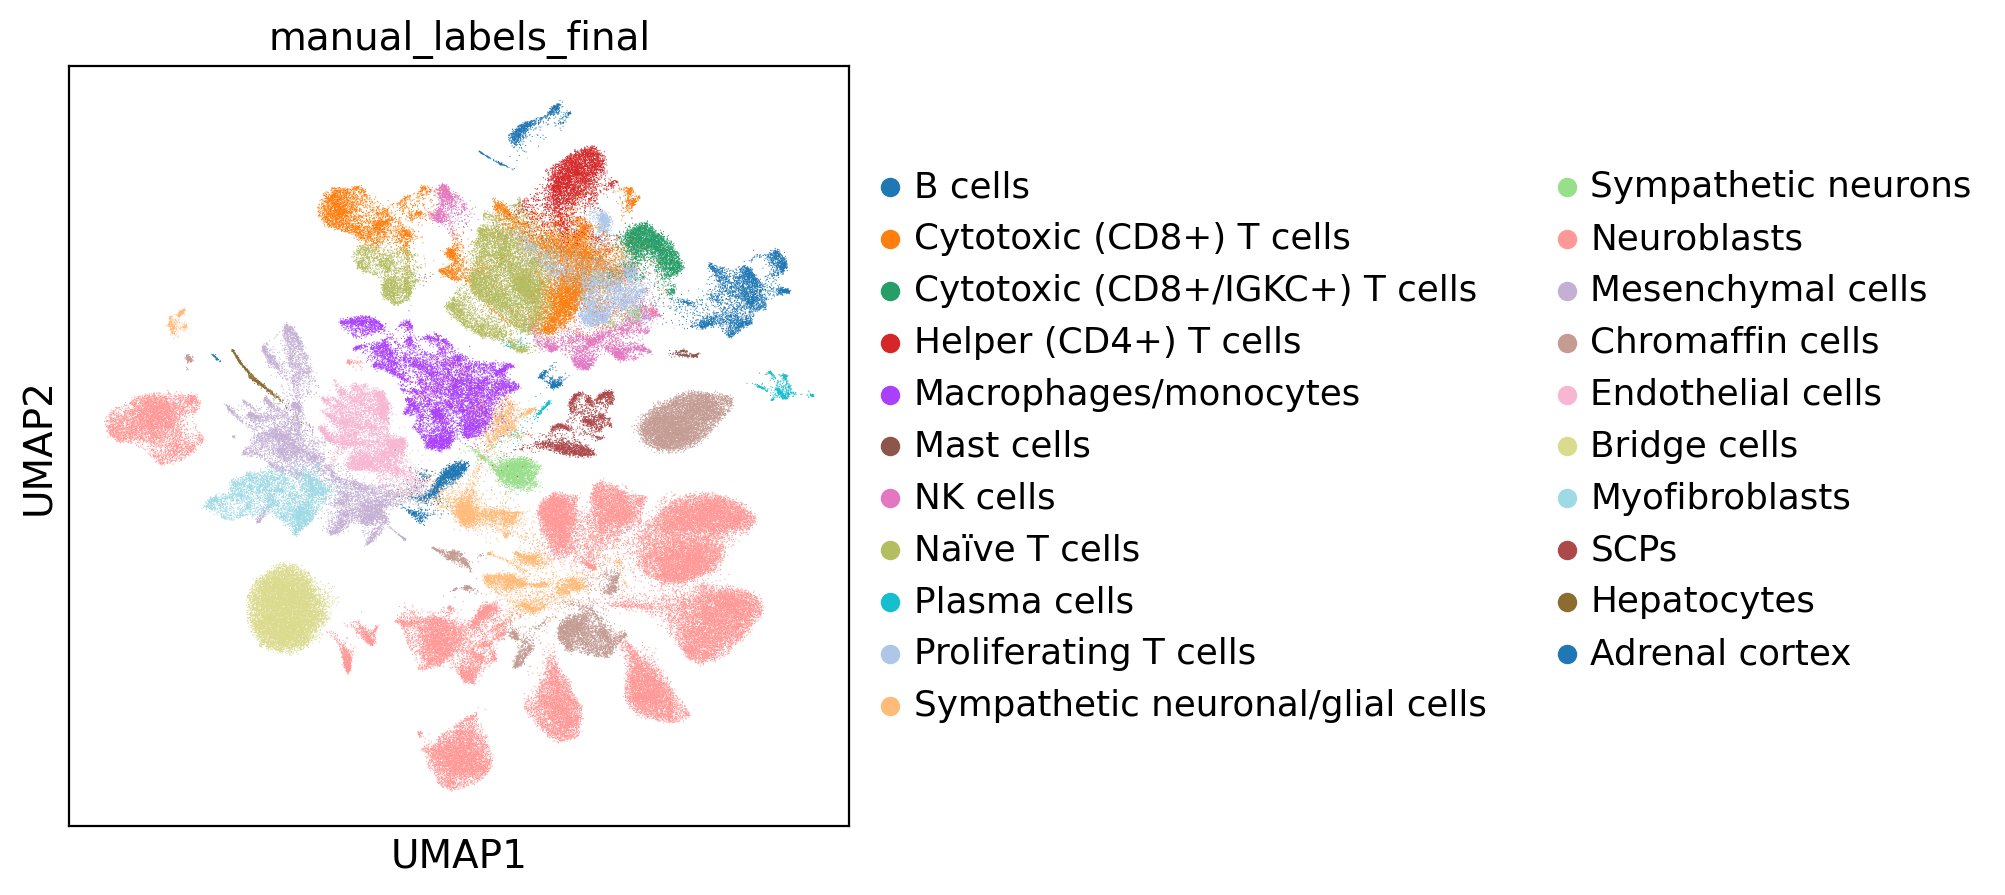

In [259]:
# Final check
sc.settings.figdir = '/project/data/gew123/Cell_Annotation/figures'
sc.pl.umap(adata, color=['manual_labels_final'], palette=mpl_colors, save='_manual_annotations_FINAL.png')

In [260]:
# Final save
adata.write('/project/data/gew123/Spatial/Objects/Reference_atlas_annotated_ALLGENES_FINAL.h5ad')

# Stats:
#   leiden_res0.9 = clusters
#   manual_labels_final = final annotations
#   all genes (64,612)
#   180,681 cells